 1.Analyse the data

2.Do exploratory data analysis

3.Do data preprocessing

4.Build models and evaluate the performance

5.Identify the cross validated score

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
data = pd.read_csv(r"C:\Users\soumy\OneDrive\Desktop\hr_dataset (1).csv")

In [199]:
data

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [200]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [201]:
data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [202]:
data.tail()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [203]:
data.shape

(14999, 10)

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [205]:
data.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

In [206]:
data.dtypes

satisfaction            float64
evaluation              float64
number_of_projects        int64
average_montly_hours      int64
time_spend_company        int64
work_accident             int64
churn                     int64
promotion                 int64
department               object
salary                   object
dtype: object

In [207]:
duplicated_df=data[data.duplicated()]
duplicated_df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [208]:
data=data.drop_duplicates()
data.shape

(11991, 10)

In [209]:
data=data.reset_index() #since the duplicate rows are dropped. 
data

,index,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
11986,11995,0.90,0.55,3,259,10,1,0,1,management,high
11987,11996,0.74,0.95,5,266,10,0,0,1,management,high
11988,11997,0.85,0.54,3,185,10,0,0,1,management,high
11989,11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [210]:
data=data.drop('index',axis=1)
data.shape

(11991, 10)

In [211]:
data

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


INSIGHTS:
* The dataset contains 11991 rows and 10 features.
* There is no missing values in the dataset.

# EDA

<function matplotlib.pyplot.show(close=None, block=None)>

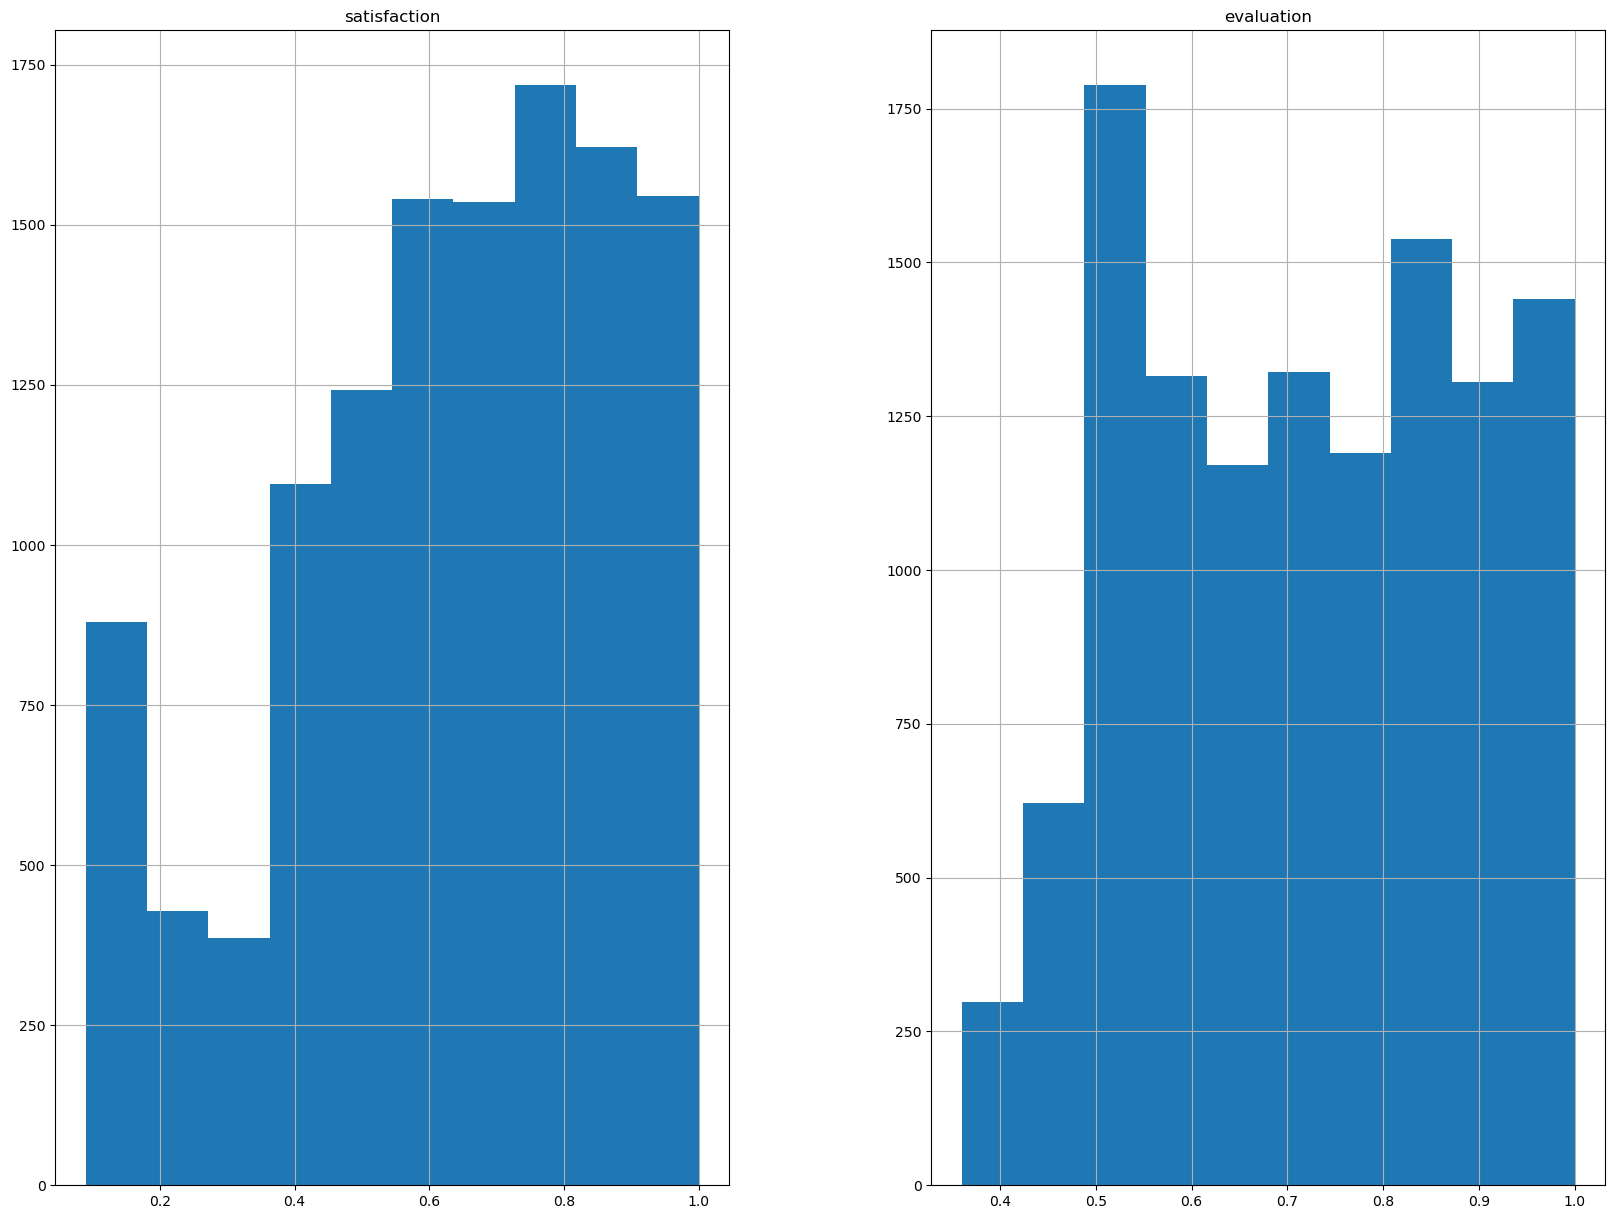

In [212]:
fraqgraph = data.select_dtypes(include=['float'])
fraqgraph.hist(figsize=(20,15))
plt.show

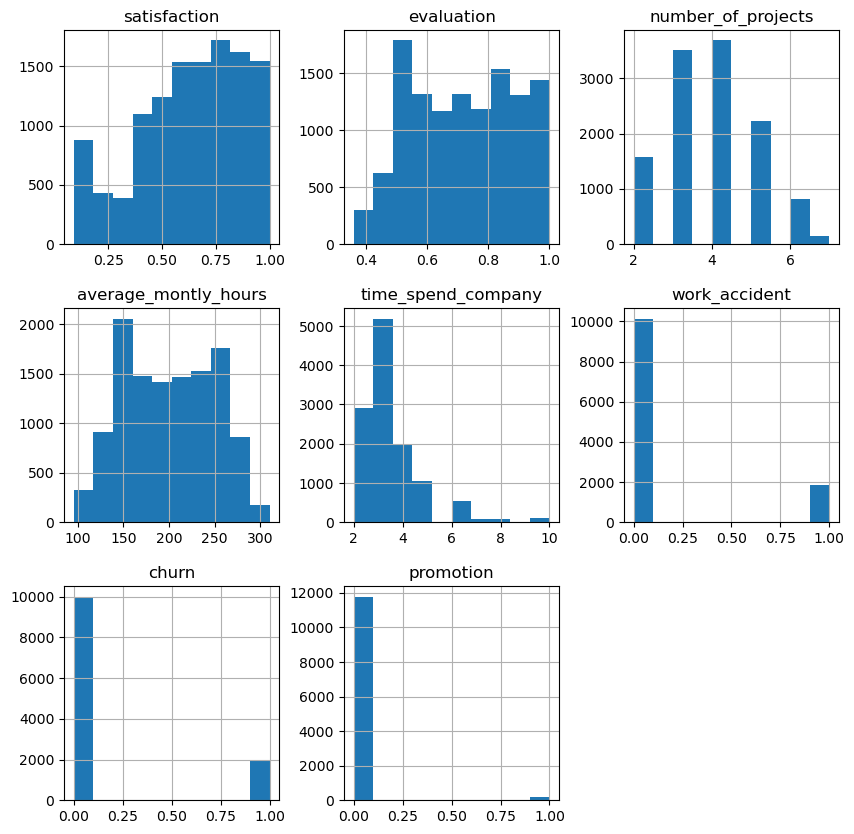

In [213]:
data.hist(figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'department')

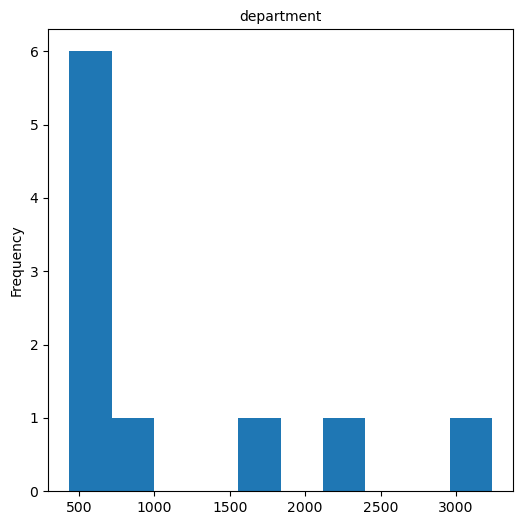

In [214]:
plt.figure(figsize=(6,6))
data['department'].value_counts().plot(kind='hist')
plt.title("department",size=10)

In [215]:
data['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 1.0, 'salary')

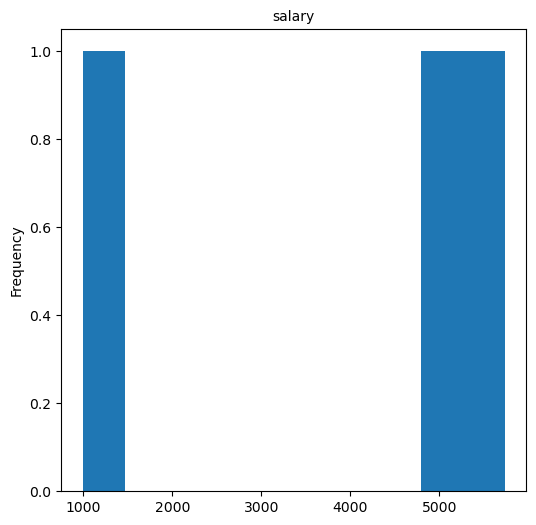

In [216]:
plt.figure(figsize=(6,6))
data['salary'].value_counts().plot(kind='hist')
plt.title("salary",size=10)

In [217]:
data['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

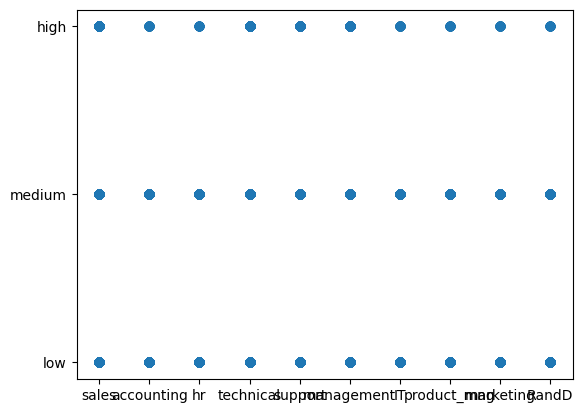

In [218]:
plt.scatter(data['department'],data['salary'])
plt.show()

INSIGHTS:
* Sales department is having the more no.of employees while the management department is having the less.
* only 8% of the employees are getting high salary.

# DPP

In [219]:
data.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

Text(0.5, 1.0, 'Box plot of satisfaction')

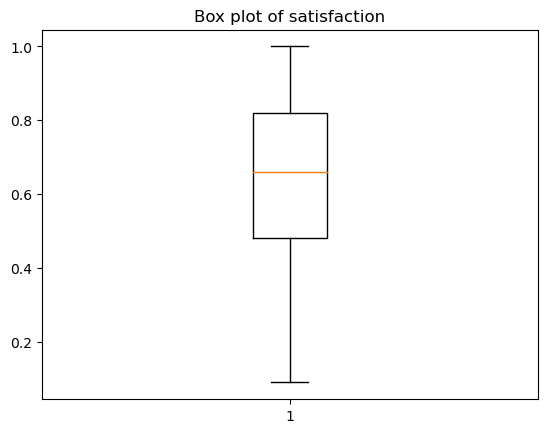

In [220]:
plt.boxplot(data['satisfaction'])
plt.title('Box plot of satisfaction')

Text(0.5, 1.0, 'Box plot of evaluation')

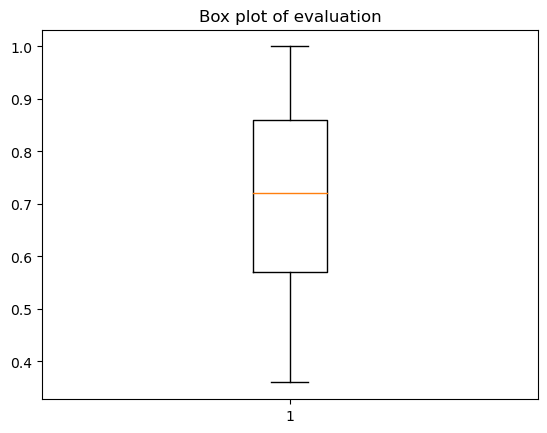

In [221]:
plt.boxplot(data['evaluation'])
plt.title('Box plot of evaluation')

Text(0.5, 1.0, 'Box plot of number_of_projects')

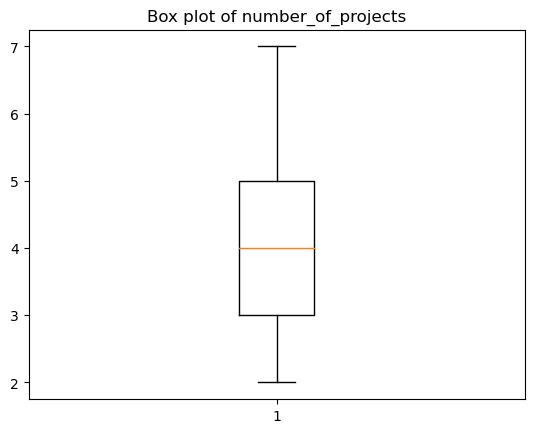

In [222]:
plt.boxplot(data['number_of_projects'])
plt.title('Box plot of number_of_projects')

Text(0.5, 1.0, 'promotion')

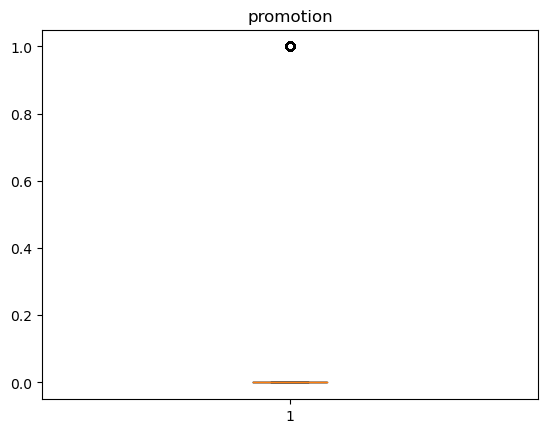

In [223]:
plt.boxplot(data['promotion'])
plt.title('promotion')

In [224]:
Q1=np.percentile(data['promotion'],25,interpolation='midpoint')
Q2=np.percentile(data['promotion'],50,interpolation='midpoint')
Q3=np.percentile(data['promotion'],75,interpolation='midpoint')

C:\Users\soumy\AppData\Local\Temp\ipykernel_18860\649950298.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['promotion'],25,interpolation='midpoint')
C:\Users\soumy\AppData\Local\Temp\ipykernel_18860\649950298.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['promotion'],50,interpolation='midpoint')
C:\Users\soumy\AppData\Local\Temp\ipykernel_18860\649950298.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'hi

In [225]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [226]:
data['promotion'].median()

0.0

In [227]:
IQR=Q3-Q1

In [228]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [229]:
print(low_lim)
print(up_lim)

0.0
0.0


In [230]:
outlier=[]
for x in data['promotion']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [231]:
outlier

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [232]:
ind1 = data['promotion']>up_lim
data.loc[ind1].index

Int64Index([   18,    82,   171,   287,   583,   750,   998,  1660,  4490,
             4491,
            ...
            11928, 11929, 11930, 11931, 11984, 11985, 11986, 11987, 11988,
            11989],
           dtype='int64', length=203)

In [233]:
data.drop([  18,    82,   171,   287,   583,   750,   998,  1660,  4490,
             4491,
            11882, 11883, 11884, 11885, 11926, 11927, 11928, 11929, 11930,
            11931], inplace=True)

Text(0.5, 1.0, 'promotion')

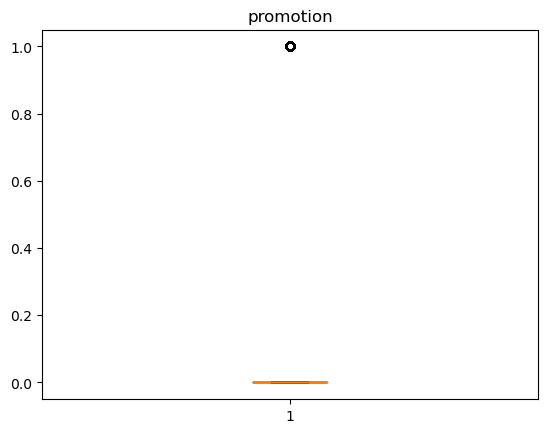

In [234]:
plt.boxplot(data['promotion'])
plt.title('promotion')

INSIGHTS:
* No missing values.

# Encoding

In [235]:
data.department.nunique()

10

In [236]:
dummies=pd.get_dummies(data['department'],drop_first=True)
data=pd.concat([data.drop(['department'],axis=1),dummies],axis=1)
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


C:\Users\soumy\AppData\Local\Temp\ipykernel_18860\161710030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


<Axes: >

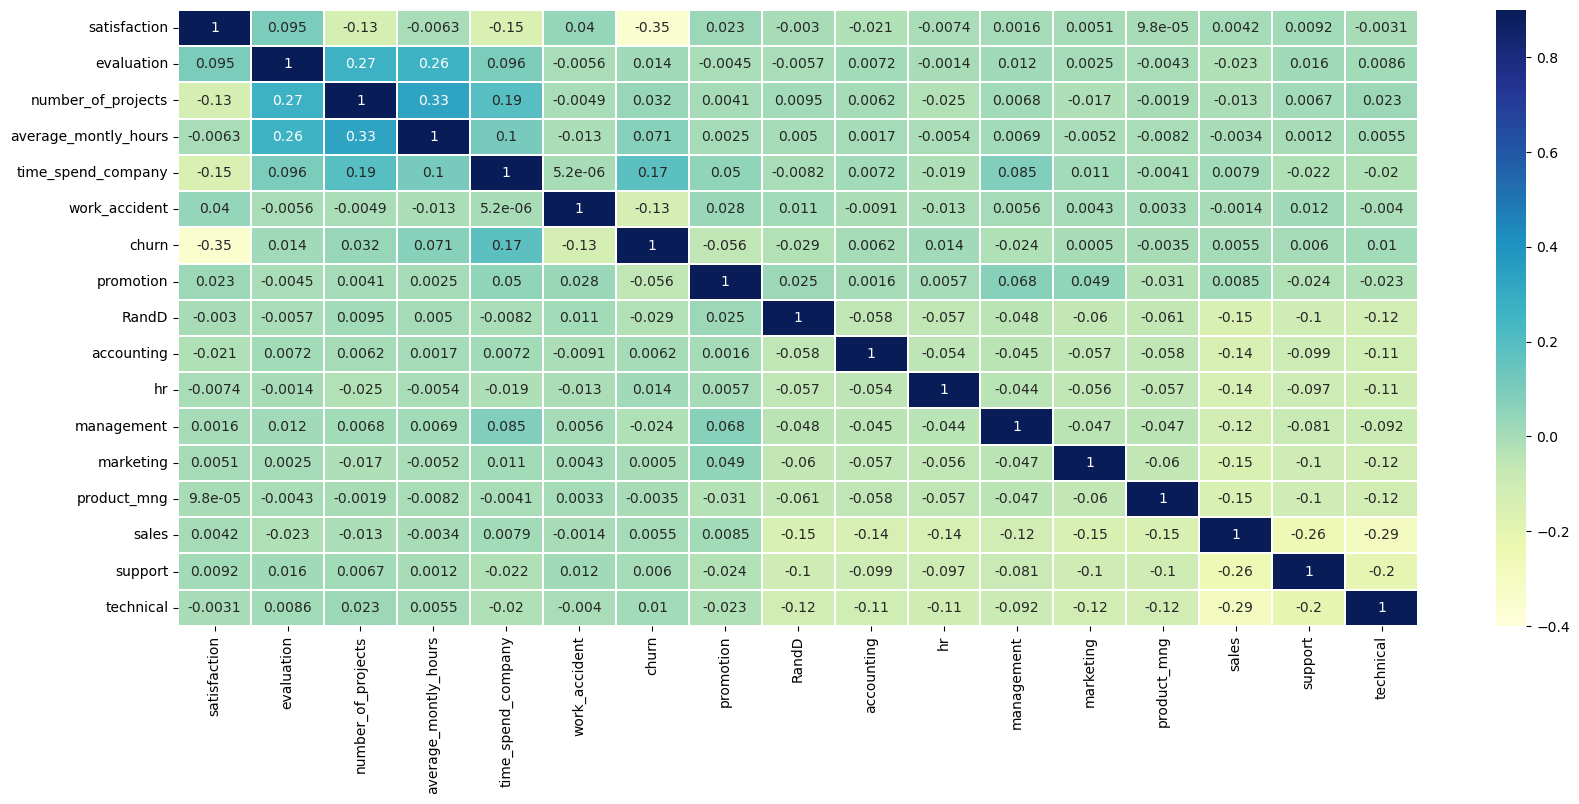

In [237]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [238]:
data.columns



Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'salary', 'RandD', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'support', 'technical'],
      dtype='object')

In [239]:
y = data['churn']
x = data.drop('churn',axis =1)

In [240]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [325]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [326]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.11692537602869445


In [327]:
from sklearn.metrics import r2_score
print('R sqaured value is:',r2_score(y_test,predictions))

R sqaured value is: 0.1645404446134514


In [242]:
data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000
mean,0.629729,0.716746,3.803525,200.520341,3.363128,0.154122,0.165650,0.015287,0.057806,0.051875,0.050205,0.035502,0.056219,0.057305,0.270320,0.152034,0.187369
std,0.241077,0.168362,1.162843,48.710210,1.328012,0.361081,0.371782,0.122697,0.233387,0.221785,0.218376,0.185054,0.230354,0.232434,0.444144,0.359069,0.390224
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [243]:
data.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'salary', 'RandD', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'support', 'technical'],
      dtype='object')

In [244]:
### model building without scaling and with scaling

In [246]:
y = data['promotion']
x = data[['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn', 'salary']]

In [247]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11971 entries, 0 to 11990
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          11971 non-null  float64
 1   evaluation            11971 non-null  float64
 2   number_of_projects    11971 non-null  int64  
 3   average_montly_hours  11971 non-null  int64  
 4   time_spend_company    11971 non-null  int64  
 5   work_accident         11971 non-null  int64  
 6   churn                 11971 non-null  int64  
 7   salary                11971 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 841.7+ KB


In [248]:
x = pd.get_dummies(x)

In [249]:
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,0,0
11987,0.74,0.95,5,266,10,0,0,1,0,0
11988,0.85,0.54,3,185,10,0,0,1,0,0
11989,0.33,0.65,3,172,10,0,0,1,0,0


In [250]:
from sklearn.model_selection import train_test_split

In [251]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 134)

In [252]:
#1.create the instance of ML model

In [253]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [254]:
#2.  fit the model

In [257]:
lg.fit(x_train, y_train)

C:\Users\soumy\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [258]:
# 3. prediction on the test data

In [259]:
y_pred = lg.predict(x_test)


In [260]:
# 4. evaluate the model performance (acc, pre, recall, con matrix, f1 score)

In [261]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [262]:
  acc = accuracy_score(y_test, y_pred)
  print(acc)

0.9853862212943633


In [263]:
confusion_matrix(y_test, y_pred)

array([[2360,    0],
       [  35,    0]], dtype=int64)

In [264]:
from sklearn.preprocessing import MinMaxScaler

In [265]:
mn = MinMaxScaler()
x_train = mn.fit_transform(x_train)
x_test = mn.fit_transform(x_test)

In [266]:
lg = LogisticRegression()

In [267]:
lg.fit(x_train, y_train)

LogisticRegression()

In [268]:
y_pred = lg.predict(x_test)

In [269]:
  acc = accuracy_score(y_test, y_pred)
  print(acc)

0.9853862212943633


In [270]:
y_test.value_counts()

0    2360
1      35
Name: promotion, dtype: int64

In [271]:
confusion_matrix(y_test, y_pred)

array([[2360,    0],
       [  35,    0]], dtype=int64)

In [272]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [273]:
precision_score(y_test, y_pred)

C:\Users\soumy\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [274]:
recall_score(y_test, y_pred)

0.0

In [275]:
f1_score(y_test, y_pred)


0.0

In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:
knn = KNeighborsClassifier(n_neighbors=11)

In [278]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [279]:
y_pred = knn.predict(x_test)

In [280]:
confusion_matrix(y_test, y_pred)

array([[2360,    0],
       [  35,    0]], dtype=int64)

In [281]:
accuracy_score(y_test, y_pred)

0.9853862212943633

In [282]:
for k in range(3,16,2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print(acc,k)

0.9832985386221295 3
0.9853862212943633 5
0.9853862212943633 7
0.9853862212943633 9
0.9853862212943633 11
0.9853862212943633 13
0.9853862212943633 15


# SVM

In [283]:
from sklearn.svm import SVC

In [284]:
sv = SVC(kernel = "linear")

In [285]:
sv.fit(x_train, y_train)

SVC(kernel='linear')

In [286]:
y_pred = sv.predict(x_test)

In [287]:
print(accuracy_score(y_test, y_pred))

0.9853862212943633


In [288]:
sv = SVC(kernel = "poly", degree= 3)

In [289]:
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9853862212943633


In [290]:
sv = SVC(kernel = "rbf")
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9853862212943633


In [291]:
from sklearn.tree import DecisionTreeClassifier

In [292]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.968267223382046


In [293]:
### k fold cross validation

In [294]:
from sklearn.model_selection import cross_val_score

In [295]:
cv_scores = cross_val_score(sv , x_train, y_train, cv = 5)

In [296]:
cv_scores

array([0.98434238, 0.9848564 , 0.9848564 , 0.9843342 , 0.9843342 ])

In [297]:
cv_scores.mean()

0.9845447162005266

In [298]:
### cross validated score of SVM is 0.98

In [299]:
mn = MinMaxScaler()
x = mn.fit_transform(x)

In [300]:
cv_scores = cross_val_score(sv , x, y, cv = 5)

In [301]:
print(cv_scores)

[0.98455115 0.98496241 0.98496241 0.9845447  0.9845447 ]


In [302]:
cv_scores.mean()


0.9847130700795134

In [303]:
data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000
mean,0.629729,0.716746,3.803525,200.520341,3.363128,0.154122,0.165650,0.015287,0.057806,0.051875,0.050205,0.035502,0.056219,0.057305,0.270320,0.152034,0.187369
std,0.241077,0.168362,1.162843,48.710210,1.328012,0.361081,0.371782,0.122697,0.233387,0.221785,0.218376,0.185054,0.230354,0.232434,0.444144,0.359069,0.390224
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [304]:
y = data["churn"]

In [305]:
x = data.drop("churn", axis=1)

In [306]:
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,low,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,high,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,1,high,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,1,high,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,1,high,0,0,0,0,1,0,0,0,0


In [307]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [308]:
le.fit(x['salary'])

LabelEncoder()

In [309]:
le.classes_ = np.array(["low","medium","high"])

In [310]:
le.classes_

array(['low', 'medium', 'high'], dtype='<U6')

In [311]:
x.loc[:,"salary"] = le.transform(x['salary'])

C:\Users\soumy\AppData\Local\Temp\ipykernel_18860\2093975770.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,"salary"] = le.transform(x['salary'])


In [312]:
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,2,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,1,2,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,1,2,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,1,2,0,0,0,0,1,0,0,0,0


In [313]:
x = pd.get_dummies(x)

In [314]:
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,2,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,1,2,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,1,2,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,1,2,0,0,0,0,1,0,0,0,0


In [315]:
from sklearn.model_selection import train_test_split

In [316]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=32 )

In [317]:
from sklearn.tree import DecisionTreeClassifier

In [318]:
dt = DecisionTreeClassifier()

In [319]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [320]:
y_pred = dt.predict(x_test)

In [321]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [322]:
acc = accuracy_score(y_test, y_pred)

In [323]:
print(acc)

0.9753653444676409


In [324]:
confusion_matrix(y_test, y_pred)

array([[1963,   29],
       [  30,  373]], dtype=int64)

In [328]:
data['salary'].value_counts()

low       5735
medium    5256
high       980
Name: salary, dtype: int64

In [329]:
data['churn'].value_counts()

0    9988
1    1983
Name: churn, dtype: int64

In [330]:
data['churn'].value_counts(normalize=True )

0    0.83435
1    0.16565
Name: churn, dtype: float64

INSIGHTS:
* 83% 0's in this column and 16% of 1's.

In [332]:
x = data.drop(['promotion'],axis=1)


In [333]:
y=data['promotion']

In [334]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.2)

In [335]:
x_train.shape

(9576, 17)